In [54]:
%matplotlib inline  

import pandas as pd
import sqlite3

conn = sqlite3.connect('../baseball.db')
c = conn.cursor()

In [55]:
at_bat_counts = pd.read_sql_query("SELECT pitcher, COUNT(event) as ab_cnt FROM event GROUP BY pitcher HAVING ab_cnt > 500", conn)

In [56]:
hr_counts = pd.read_sql_query("SELECT pitcher, COUNT(event) as hr_cnt FROM event WHERE event='Home Run' GROUP BY pitcher", conn)

In [57]:
total_counts = hr_counts.merge(at_bat_counts)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f9df9cb00>]], dtype=object)

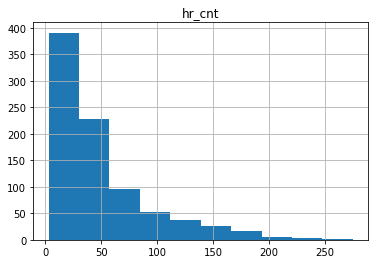

In [58]:
total_counts.hist(column='hr_cnt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f9df1d8d0>]], dtype=object)

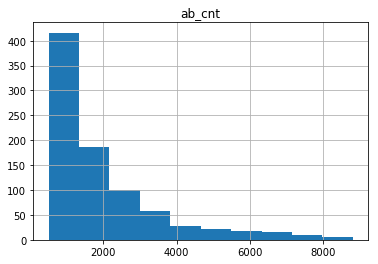

In [59]:
total_counts.hist(column='ab_cnt')

In [60]:
total_counts['hr_perc'] = total_counts['hr_cnt'] / total_counts['ab_cnt']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f9e7a6630>]], dtype=object)

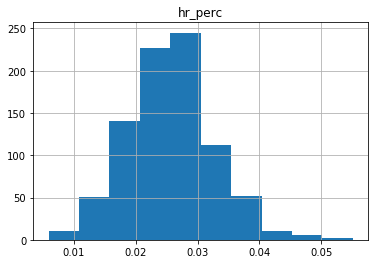

In [61]:
total_counts.hist(column='hr_perc')

In [67]:
all_pitchers = pd.read_sql_query('SELECT * FROM pitcher', conn)

In [63]:
total_counts = total_counts.merge(all_pitchers, left_on=['pitcher'], right_on=['mlb_id'])
total_counts = total_counts.drop(['pitcher', 'mlb_id'], axis=1)

In [64]:
total_counts.sort_values(by='hr_perc')

,hr_cnt,ab_cnt,hr_perc,id,name
842,3,510,0.005882,3270,Kyle Barraclough
788,4,522,0.007663,2720,Brandon Cumpton
66,7,795,0.008805,409,MacDougal
587,5,567,0.008818,1609,Dan Runzler
354,5,563,0.008881,890,Russell
644,5,556,0.008993,2654,Taylor Jordan
306,21,2309,0.009095,231,Ziegler
704,7,763,0.009174,1770,Blaine Hardy
647,7,683,0.010249,1643,Layne
444,10,951,0.010515,1588,Venters


In [66]:
total_counts.sort_values(by='hr_perc', ascending=False)

,hr_cnt,ab_cnt,hr_perc,id,name
737,30,544,0.055147,2411,Steve Geltz
296,29,556,0.052158,964,Geer
125,40,823,0.048603,156,Backe
401,97,2022,0.047972,2412,A.J. Griffin
629,41,864,0.047454,2154,Paul Clemens
382,30,654,0.045872,463,Reynolds
828,30,658,0.045593,2546,Erik Johnson
546,25,549,0.045537,2616,Kirby Yates
376,23,517,0.044487,416,Devries
829,47,1071,0.043884,2552,Adam Morgan
